In [1]:
import torch
from tools.inference import CaptionGenerator
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

In [18]:

cuda = False
checkpoint = torch.load('./results/captions/checkpoint1.pth.tar')
model = checkpoint['model']
img_transform, target_tok = checkpoint['tokenizers'].values()

caption_model = CaptionGenerator(model,
                               img_transform=img_transform(allow_var_size=True, train=False),
                               target_tok=target_tok,
                               beam_size=1,
                               get_attention=True,
                               length_normalization_factor=0.,
                               cuda=cuda)

def show_and_tell(filename):
    img = Image.open(filename, 'r')
    %matplotlib inline
    imshow(np.asarray(img))
    return caption_model.describe(img)

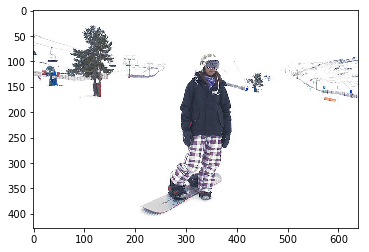

In [19]:
x=show_and_tell('/media/ssd/Datasets/COCO/val2014/COCO_val2014_000000200058.jpg')

In [20]:
x[0]

' truck parked on the side of a road with a large clock tower. on it. side. and a large building with a clock on it. of it. and a blue sky. on the side of the road. and a man is riding a skateboard on the street. of the'